In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 

from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

tf.random.set_seed(42)

print('currently running tensorflow version: ' + tf.__version__)
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


currently running tensorflow version: 2.8.0


In [2]:
predictions = gl.predictions_finder()
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)
predictions.sort_values('predicted volume')

100%|██████████| 180/180 [00:06<00:00, 26.51it/s]


,architecture,learning rate,coregistration,predicted volume,std dev
3,32-18,0.1,6,55.289051,24.828042
7,9-9,0.1,6,64.544050,23.213264
0,10-5,0.01,6,94.584252,30.742097
4,48-28,0.01,6,104.152794,22.283730
5,9-9,0.01,6,112.410196,32.590094
2,32-18,0.01,6,114.297160,31.614610
6,9-9,0.001,6,126.174277,52.935563
1,10-5,0.001,6,141.519294,47.413693


In [6]:
idx = 5
training_module =  predictions['coregistration'].iloc[idx]
architecture = predictions['architecture'].iloc[idx]
learning_rate = predictions['learning rate'].iloc[idx]
epochs = '999'
df_glob = gl.global_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)
df_reg = gl.regional_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)

gl.glathida_stats_adder(
    df_reg,
#     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
#     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
#     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df_reg

df_glob
df = df_glob[[
    'avg predicted thickness','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
    '11','12','13','14','15','16','17','18','19','20','21',
    '22','23','24',
]]

100%|██████████| 15/15 [00:00<00:00, 364.89it/s]


In [7]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()

RGI = gl.RGI_loader()
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
# drops = RGI[

# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, df, left_index = True, right_index = True)
ref = ref.rename(columns = {
    'avg predicted thickness':'Edasi Mean Thickness'
})
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)
ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Edasi Mean Thickness,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,15.015371,16.945759,9.970110,26.072716,10.791170,10.345212,13.016750,10.212097,20.239134,19.185260,30.289837,13.922557,15.272777,5.927180,11.286120,12.856776,10.881903,10.584810,36.786660,14.177551,17.174845,11.026198,11.350098,9.254328,18.850338,8.964076,0.708873
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,33.972282,35.368850,25.750679,37.156260,34.219814,37.799297,27.714024,34.784634,35.051000,43.309650,38.371025,36.498417,35.884865,29.674109,26.664600,34.333440,43.219730,22.579327,37.175760,43.958755,34.852650,23.901138,31.680979,26.471700,30.138577,42.747784,1.113134
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,31.869085,33.918808,25.487564,35.617450,32.719850,35.299747,25.975235,32.077390,32.038570,39.977673,34.832860,34.134705,33.118454,28.629820,27.691248,33.337093,41.571793,22.369720,33.926655,38.307148,33.519670,23.664341,28.398443,23.709429,28.123257,38.280193,0.897250
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,39.660088,41.945960,42.376774,42.231342,36.822075,44.141212,33.812675,40.287720,37.777943,42.331820,39.223312,39.059483,40.583973,39.091570,41.429790,40.207590,51.001280,31.877243,36.877320,38.407795,42.933537,33.886270,40.999435,37.860657,32.348980,43.986430,0.747214
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,41.223770,43.999430,37.437206,44.747140,38.824158,46.292843,35.066433,39.507164,43.018020,46.246223,44.791443,41.785107,43.878610,37.603546,40.104490,40.856705,49.190807,32.616142,40.949432,46.035800,44.436665,31.964794,43.106895,36.617306,32.401955,49.116010,0.867518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,60.232002,38.387836,42.616627,63.116726,55.405296,61.561860,83.394684,33.846123,121.928000,70.435320,107.875084,43.506374,57.760933,94.005394,50.252300,53.064430,81.487890,37.603610,57.563640,87.978584,44.766422,47.461952,56.765003,16.707607,65.330690,32.977642,4.651833
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,45.422520,25.101800,28.129417,46.365536,40.748882,48.052464,69.377230,21.531330,91.576220,49.483670,85.685620,32.538685,47.527615,75.896870,38.145440,41.580177,67.947296,27.932291,30.379730,68.756530,34.327774,35.750217,40.579178,8.221863,50.531166,29.395996,1.984026
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,41.114090,20.245913,24.973469,40.027958,37.079060,42.397230,69.016110,21.750175,79.753136,44.861576,75.453330,29.238506,45.395573,70.314130,32.765194,36.283787,63.114830,27.348658,23.307272,65.101020,31.572410,32.243670,36.747940,6.869535,46.593433,25.398409,0.675390
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,38.337143,18.248114,19.780050,39.028350,32.684593,40.505543,66.700050,22.704971,71.246070,40.608906,73.592630,27.367040,42.707592,64.084580,31.211370,34.459328,62.187576,24.271246,18.325409,60.144493,31.345053,31.432610,31.675512,6.869535,43.701680,23.546230,3.813236


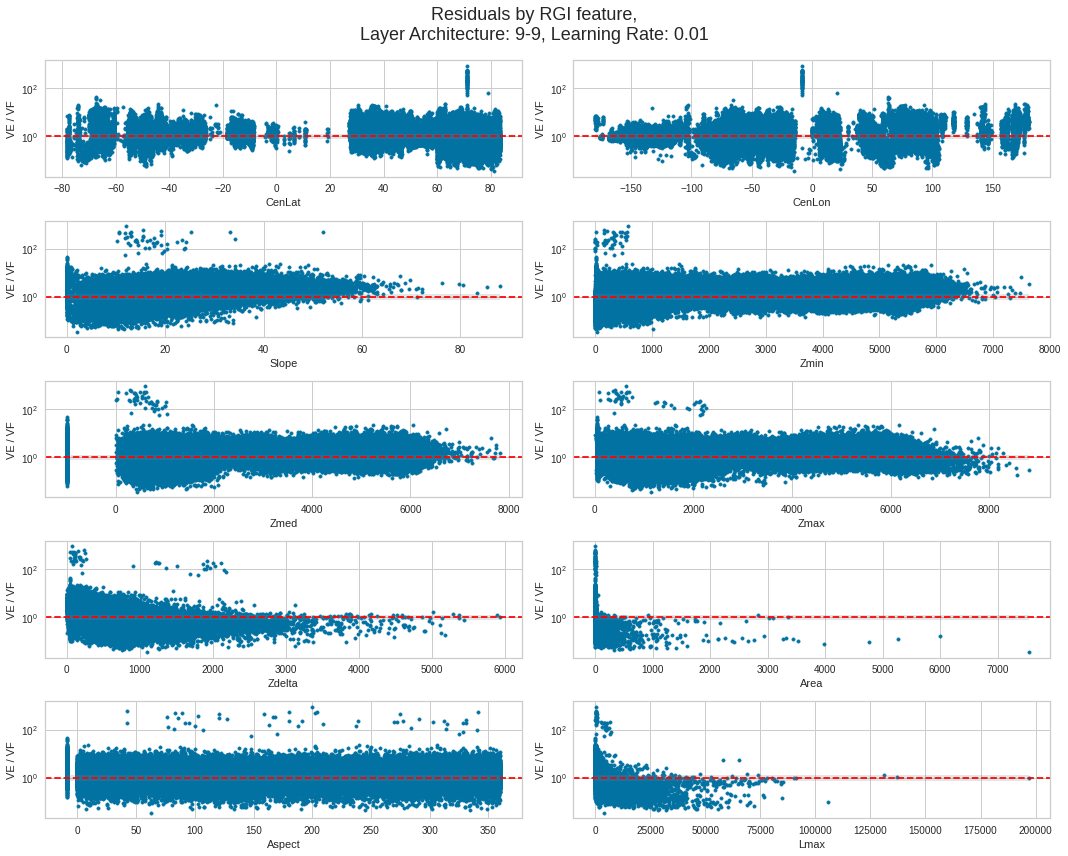

In [9]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Residuals by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        ref['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

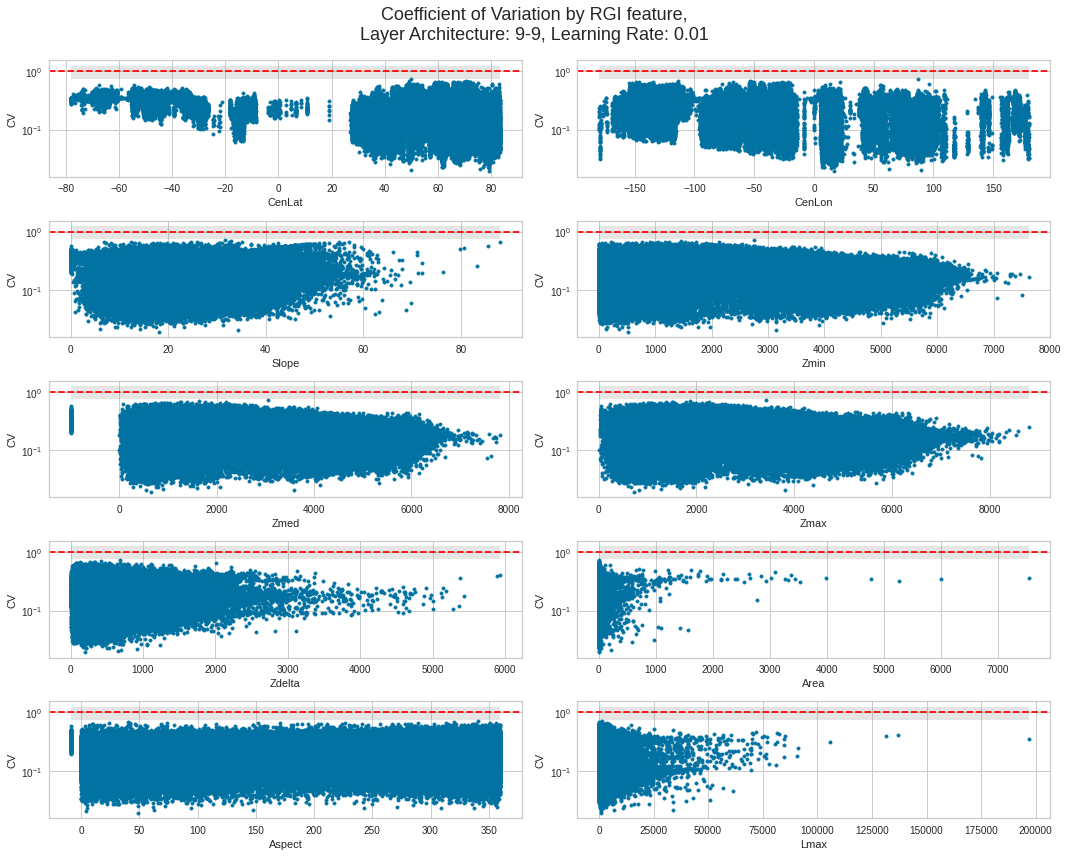

In [11]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Coefficient of Variation by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]

for n, variable in enumerate(dft):

    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('CV')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        (ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].std(axis = 1)) / ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].mean(axis = 1) ,
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

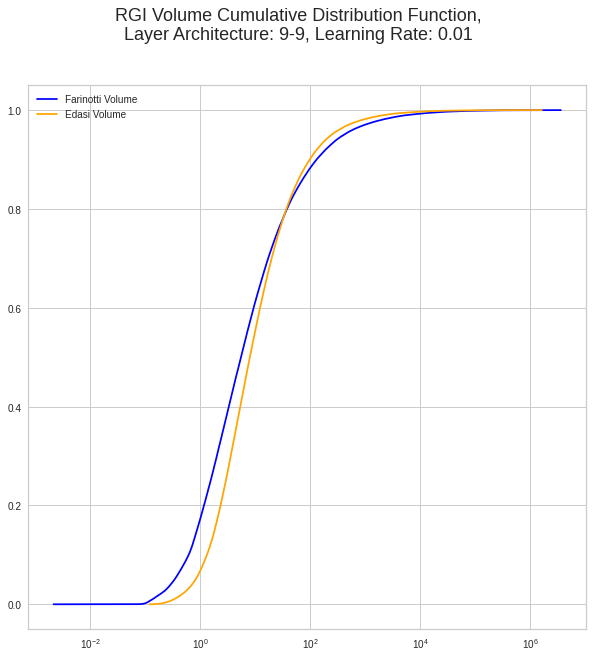

In [15]:
data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(10, 10))

plt.subplots_adjust(hspace=0.5)

plt.suptitle('RGI Volume Cumulative Distribution Function' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')


plt.subplots_adjust(hspace=0.5)
plt.plot(
    x_1, 
    y_1,
    c = 'blue',
    label = 'Farinotti Volume'
    
)
plt.plot(
    x_2, 
    y_2,
    c = 'orange',
    label = 'Edasi Volume'
)
plt.legend()
ax.set_xscale('log')

219688


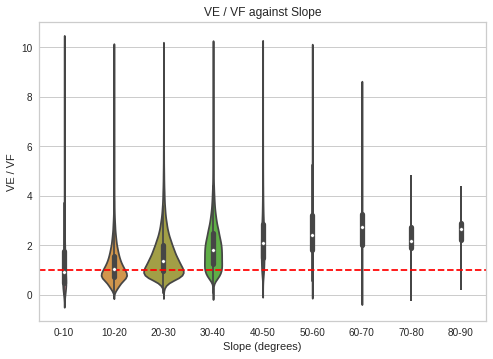

In [16]:
dfr = pd.DataFrame()
for i in range(0, 90, 10):
    dft = ref.loc[(ref['Slope'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Slope (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Slope (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Slope')
print(len(dfr))



Text(0.5, 1.0, 'VE / VF against Area')

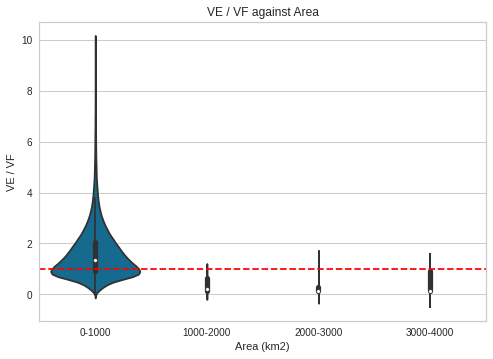

In [17]:
dfr = pd.DataFrame()
for i in range(0, 4000, 1000):
    dft = ref.loc[(ref['Area'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Area (km2)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Area (km2)'],
    y = dfr['VE / VF'],
    inner = 'box',
    scale = 'count',
#     inner = None
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Area')

Text(0.5, 1.0, 'VE / VF against Lmax (m)')

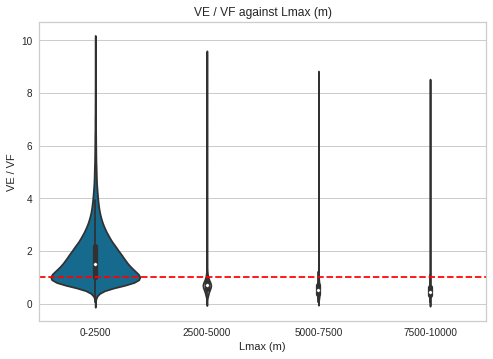

In [18]:
dfr = pd.DataFrame()
for i in range(0, 10000, 2500):
    dft = ref.loc[(ref['Lmax'].between(i, i + 2500)) & (ref['VE / VF'] <= 10)]
    dft['Lmax (m)'] = str(i) + '-' + str(i + 2500)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Lmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Lmax (m)')

Text(0.5, 1.0, 'VE / VF against Zmin')

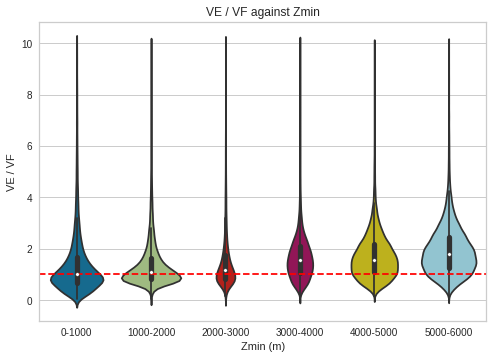

In [19]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmin'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmin (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmin (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmin')


Text(0.5, 1.0, 'VE / VF against Zmed')

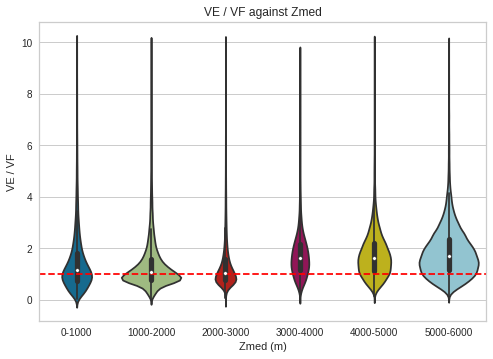

In [20]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmed'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmed (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmed (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmed')

Text(0.5, 1.0, 'VE / VF against Zmax')

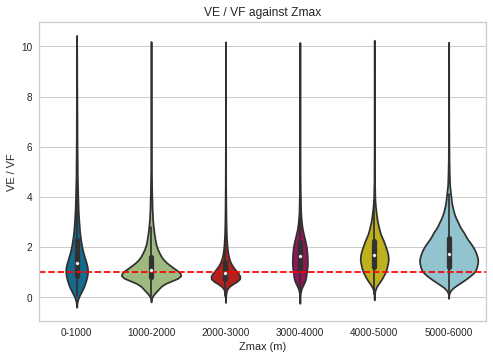

In [21]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmax')

Text(0.5, 1.0, 'VE / VF against Zdelta')

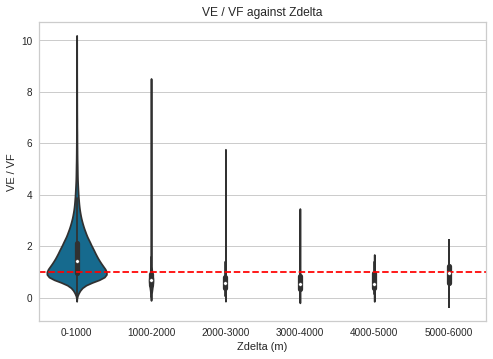

In [22]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zdelta'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zdelta (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zdelta (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zdelta')


Text(0.5, 1.0, 'VE / VF against Cent Lat')

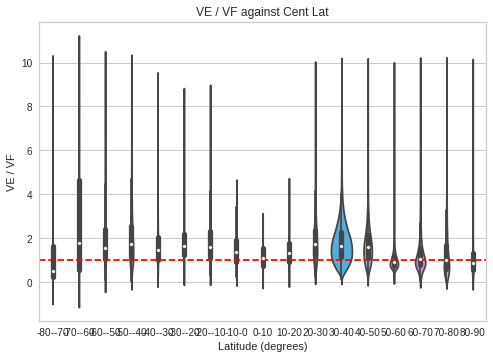

In [23]:
dfr = pd.DataFrame()
for i in range(-90, 100, 10):
    dft = ref.loc[(ref['CenLat'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Latitude (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Latitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lat')


Text(0.5, 1.0, 'VE / VF against Cent Lon')

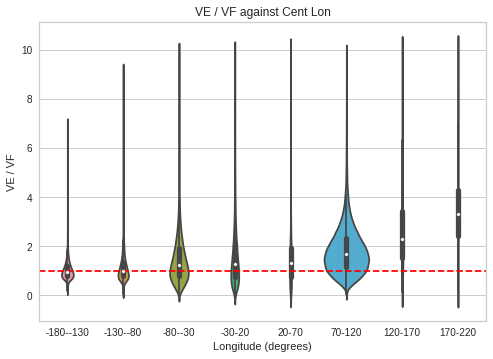

In [24]:
dfr = pd.DataFrame()
for i in range(-180, 190, 50):
    dft = ref.loc[(ref['CenLon'].between(i, i + 50)) & (ref['VE / VF'] <= 10)]
    dft['Longitude (degrees)'] = str(i) + '-' + str(i + 50)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Longitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lon')